# IPO Analysis: Questions 5 & 6
## SPAC vs Non-SPAC Returns and Index Inclusion Performance

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load and prepare data
stock_ipos = pd.read_csv('stock_ipos_20231004.csv')
stock_ipos = stock_ipos.dropna(subset=['ipo_date'])
stock_ipos['ipo_date'] = pd.to_datetime(stock_ipos['ipo_date'])

print(f"Total IPOs in dataset: {len(stock_ipos)}")

Total IPOs in dataset: 3681


C:\Users\nduta\AppData\Local\Temp\ipykernel_13456\1043079026.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stock_ipos['ipo_date'] = pd.to_datetime(stock_ipos['ipo_date'])


In [3]:
# Identify SPACs
stock_spacs = pd.read_excel('list_of_all_spacs.xlsx')
spacs_tkrs = list(stock_spacs['symbol'])
stock_ipos['spac'] = np.where(stock_ipos['symbol'].isin(spacs_tkrs), 'yes', 'no')

print(f"SPACs: {(stock_ipos['spac'] == 'yes').sum()}")
print(f"Non-SPACs: {(stock_ipos['spac'] == 'no').sum()}")

SPACs: 251
Non-SPACs: 3430


In [4]:
# Identify S&P 500 and Russell 1000
sp500 = pd.read_excel('sp500_202308.xlsx')
sp500_tkrs = list(sp500['symbol'])
stock_ipos['sp'] = np.where(stock_ipos['symbol'].isin(sp500_tkrs), 'yes', 'no')

russ1000 = pd.read_excel('russ_1000_202308.xlsx')
russ_tkrs = list(russ1000['symbol'])
stock_ipos['russell'] = np.where(stock_ipos['symbol'].isin(russ_tkrs), 'yes', 'no')

print(f"S&P 500 included: {(stock_ipos['sp'] == 'yes').sum()}")
print(f"Russell 1000 included: {(stock_ipos['russell'] == 'yes').sum()}")

S&P 500 included: 51
Russell 1000 included: 143


## Question 5(i): Day 0 Return Analysis

In [5]:
# Flag abnormal returns
stock_ipos['day0_lvl'] = np.where(stock_ipos['sym_day0_OTC'] < 1, 'normal', 'abnormal')

# Summary statistics
day0_summary = stock_ipos.groupby(['day0_lvl', 'spac'])['sym_day0_OTC'].agg(
    ['mean', 'median', 'std', 'count', 'min', 'max']
)
print("Day 0 Return Statistics by Level and SPAC Status:")
print(day0_summary)

Day 0 Return Statistics by Level and SPAC Status:
                   mean    median       std  count       min        max
day0_lvl spac                                                          
abnormal no    2.917992  2.244721  3.009960     30  1.017391  17.750000
normal   no   -0.004677  0.000000  0.126626   3400 -0.851190   0.973500
         yes  -0.008804  0.000000  0.070245    251 -0.550420   0.428571


In [6]:
# Overall comparison
day0_overall = stock_ipos.groupby('spac')['sym_day0_OTC'].agg(
    ['mean', 'median', 'std', 'count']
)
print("\nOverall Day 0 Return by SPAC Status:")
print(day0_overall)


Overall Day 0 Return by SPAC Status:
          mean  median       std  count
spac                                   
no    0.020885     0.0  0.408161   3430
yes  -0.008804     0.0  0.070245    251


C:\Users\nduta\AppData\Local\Temp\ipykernel_13456\3408732007.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='spac', y='sym_day0_OTC', data=filtered_data, ax=axes[1],
C:\Users\nduta\AppData\Local\Temp\ipykernel_13456\3408732007.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non-SPAC', 'SPAC'])


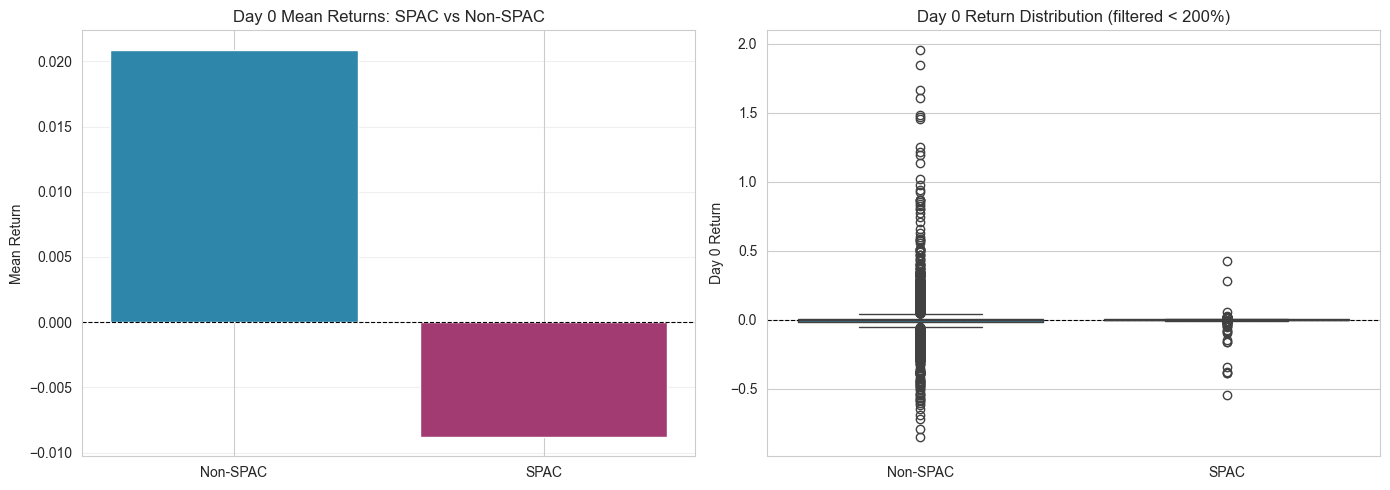

In [7]:
# Visualization: Day 0 Returns Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of mean returns
day0_means = stock_ipos.groupby('spac')['sym_day0_OTC'].mean()
axes[0].bar(['Non-SPAC', 'SPAC'], day0_means.values, color=['#2E86AB', '#A23B72'])
axes[0].set_ylabel('Mean Return')
axes[0].set_title('Day 0 Mean Returns: SPAC vs Non-SPAC')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].grid(axis='y', alpha=0.3)

# Box plot for distribution
# Filter extreme outliers for better visualization
filtered_data = stock_ipos[stock_ipos['sym_day0_OTC'] < 2]
sns.boxplot(x='spac', y='sym_day0_OTC', data=filtered_data, ax=axes[1], 
            palette=['#2E86AB', '#A23B72'])
axes[1].set_xticklabels(['Non-SPAC', 'SPAC'])
axes[1].set_ylabel('Day 0 Return')
axes[1].set_xlabel('')
axes[1].set_title('Day 0 Return Distribution (filtered < 200%)')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.savefig('day0_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 5(ii): Multi-Window Return Analysis

In [8]:
# Analyze returns across different windows
windows = ['sym_5day_ret', 'sym_22day_ret', 'sym_91day_ret', 'sym_252day_ret']
window_names = ['5-day', '22-day', '91-day', '252-day']

for w, name in zip(windows, window_names):
    print(f"\n{name} Return Statistics:")
    print(stock_ipos.groupby('spac')[w].agg(['mean', 'median', 'std', 'count']))


5-day Return Statistics:
          mean    median       std  count
spac                                     
no    0.034031  0.000000  1.252358   3430
yes   0.021284  0.001029  0.276315    251

22-day Return Statistics:
          mean    median       std  count
spac                                     
no    0.047191  0.002239  1.344239   3430
yes   0.030329  0.003061  0.376508    251

91-day Return Statistics:
          mean    median       std  count
spac                                     
no    0.060706  0.001021  2.007227   3430
yes   0.030150  0.009231  0.477305    251

252-day Return Statistics:
          mean    median       std  count
spac                                     
no    0.042634 -0.006979  2.968079   3430
yes   0.013135  0.037302  0.157165    251


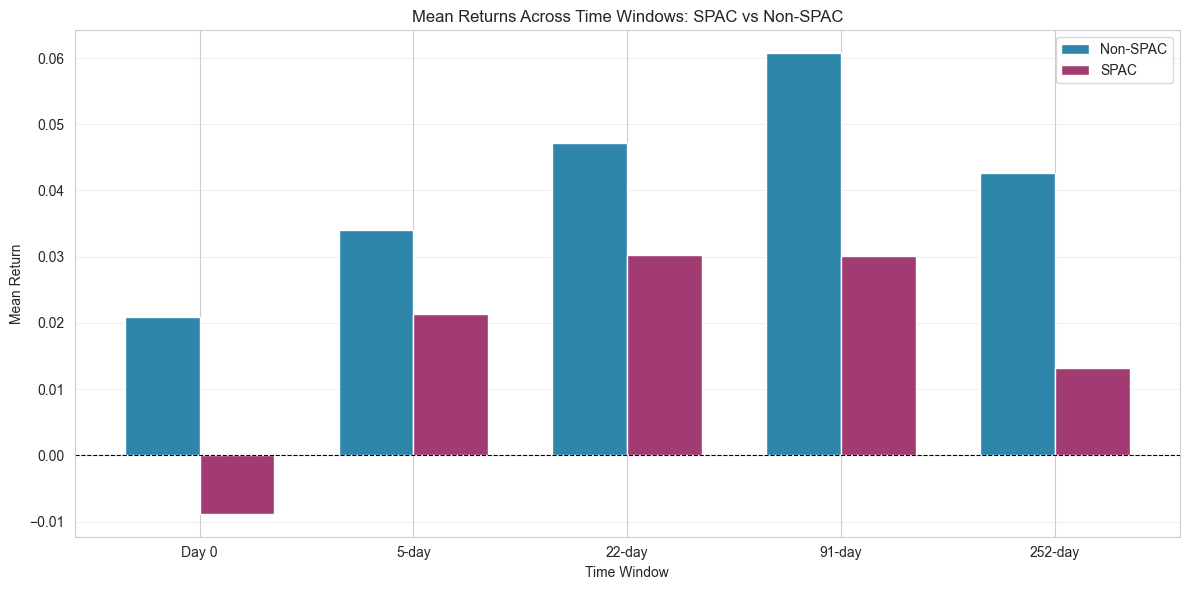

In [9]:
# Visualization: Mean Returns Across Time Windows
windows = ['sym_day0_OTC', 'sym_5day_ret', 'sym_22day_ret', 'sym_91day_ret', 'sym_252day_ret']
window_labels = ['Day 0', '5-day', '22-day', '91-day', '252-day']

spac_means = [stock_ipos[stock_ipos['spac'] == 'yes'][w].mean() for w in windows]
nonspac_means = [stock_ipos[stock_ipos['spac'] == 'no'][w].mean() for w in windows]

x = np.arange(len(window_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, nonspac_means, width, label='Non-SPAC', color='#2E86AB')
bars2 = ax.bar(x + width/2, spac_means, width, label='SPAC', color='#A23B72')

ax.set_xlabel('Time Window')
ax.set_ylabel('Mean Return')
ax.set_title('Mean Returns Across Time Windows: SPAC vs Non-SPAC')
ax.set_xticks(x)
ax.set_xticklabels(window_labels)
ax.legend()
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('multiwindow_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

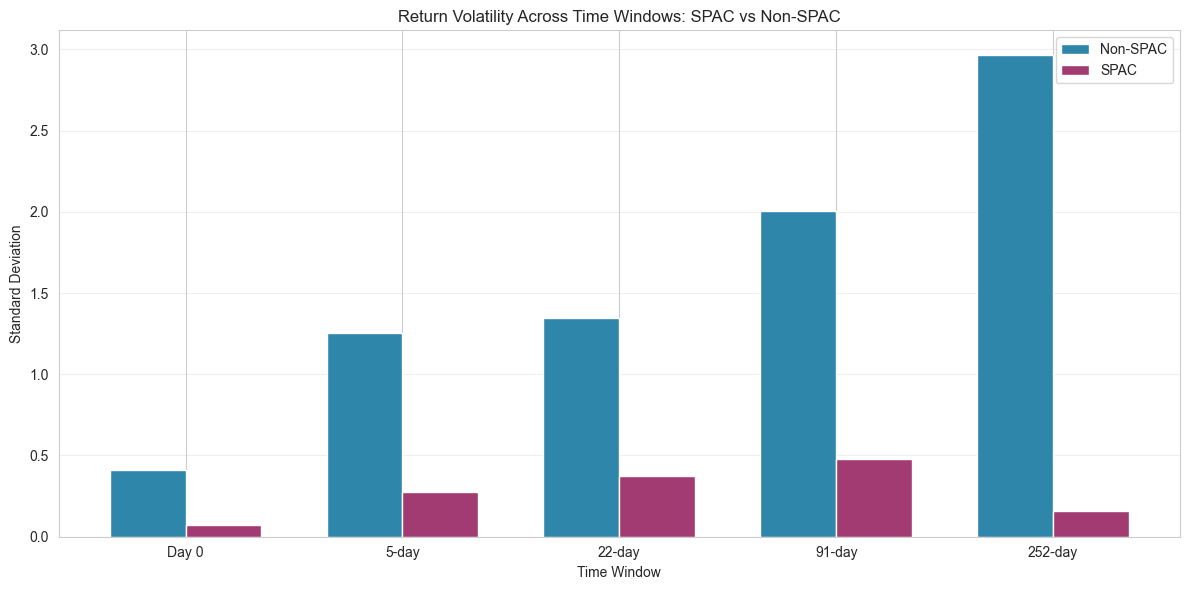

In [10]:
# Visualization: Volatility Comparison
spac_stds = [stock_ipos[stock_ipos['spac'] == 'yes'][w].std() for w in windows]
nonspac_stds = [stock_ipos[stock_ipos['spac'] == 'no'][w].std() for w in windows]

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, nonspac_stds, width, label='Non-SPAC', color='#2E86AB')
bars2 = ax.bar(x + width/2, spac_stds, width, label='SPAC', color='#A23B72')

ax.set_xlabel('Time Window')
ax.set_ylabel('Standard Deviation')
ax.set_title('Return Volatility Across Time Windows: SPAC vs Non-SPAC')
ax.set_xticks(x)
ax.set_xticklabels(window_labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('volatility_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 6: S&P 500 Inclusion Performance

In [11]:
# S&P 500 inclusion performance
sp_performance = stock_ipos.groupby('sp')['sym_252day_ret'].agg(
    ['mean', 'median', 'std', 'count', 'min', 'max']
)
print("S&P 500 Inclusion Performance (1-year return):")
print(sp_performance)

S&P 500 Inclusion Performance (1-year return):
         mean    median       std  count       min         max
sp                                                            
no   0.037079  0.000000  2.884588   3630 -0.997339  129.200000
yes  0.292900  0.171014  0.538144     51 -0.718000    2.448239


C:\Users\nduta\AppData\Local\Temp\ipykernel_13456\1590041005.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sp', y='sym_252day_ret', data=filtered_sp, ax=axes[1],
C:\Users\nduta\AppData\Local\Temp\ipykernel_13456\1590041005.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Included', 'Included'])


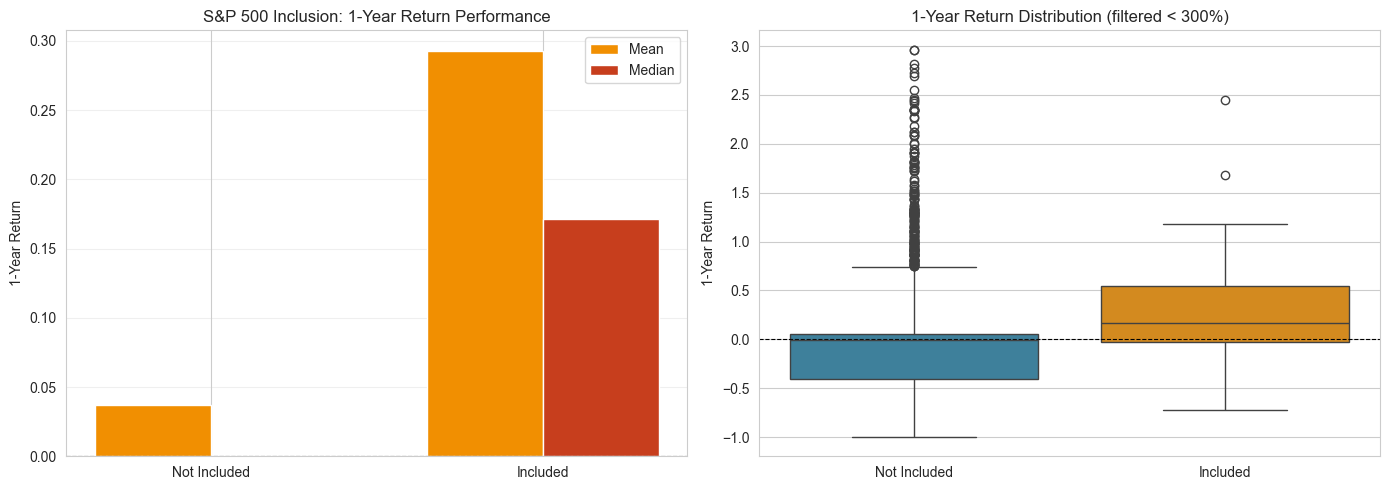

In [12]:
# Visualization: S&P 500 Performance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mean and Median comparison
sp_stats = stock_ipos.groupby('sp')['sym_252day_ret'].agg(['mean', 'median'])
x_pos = np.arange(2)
width = 0.35

axes[0].bar(x_pos - width/2, sp_stats['mean'].values, width, label='Mean', color='#F18F01')
axes[0].bar(x_pos + width/2, sp_stats['median'].values, width, label='Median', color='#C73E1D')
axes[0].set_ylabel('1-Year Return')
axes[0].set_title('S&P 500 Inclusion: 1-Year Return Performance')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(['Not Included', 'Included'])
axes[0].legend()
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].grid(axis='y', alpha=0.3)

# Box plot
filtered_sp = stock_ipos[stock_ipos['sym_252day_ret'] < 3]
sns.boxplot(x='sp', y='sym_252day_ret', data=filtered_sp, ax=axes[1],
            palette=['#2E86AB', '#F18F01'])
axes[1].set_xticklabels(['Not Included', 'Included'])
axes[1].set_ylabel('1-Year Return')
axes[1].set_xlabel('')
axes[1].set_title('1-Year Return Distribution (filtered < 300%)')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.savefig('sp500_performance.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 6(i): Russell 1000 Inclusion Performance

In [13]:
# Russell 1000 inclusion performance
russell_performance = stock_ipos.groupby('russell')['sym_252day_ret'].agg(
    ['mean', 'median', 'std', 'count', 'min', 'max']
)
print("Russell 1000 Inclusion Performance (1-year return):")
print(russell_performance)

Russell 1000 Inclusion Performance (1-year return):
             mean    median       std  count       min         max
russell                                                           
no       0.030883 -0.001020  2.918564   3538 -0.997339  129.200000
yes      0.281593  0.133805  0.737627    143 -0.885246    4.414086


C:\Users\nduta\AppData\Local\Temp\ipykernel_13456\964321334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='russell', y='sym_252day_ret', data=filtered_russell, ax=axes[1],
C:\Users\nduta\AppData\Local\Temp\ipykernel_13456\964321334.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Included', 'Included'])


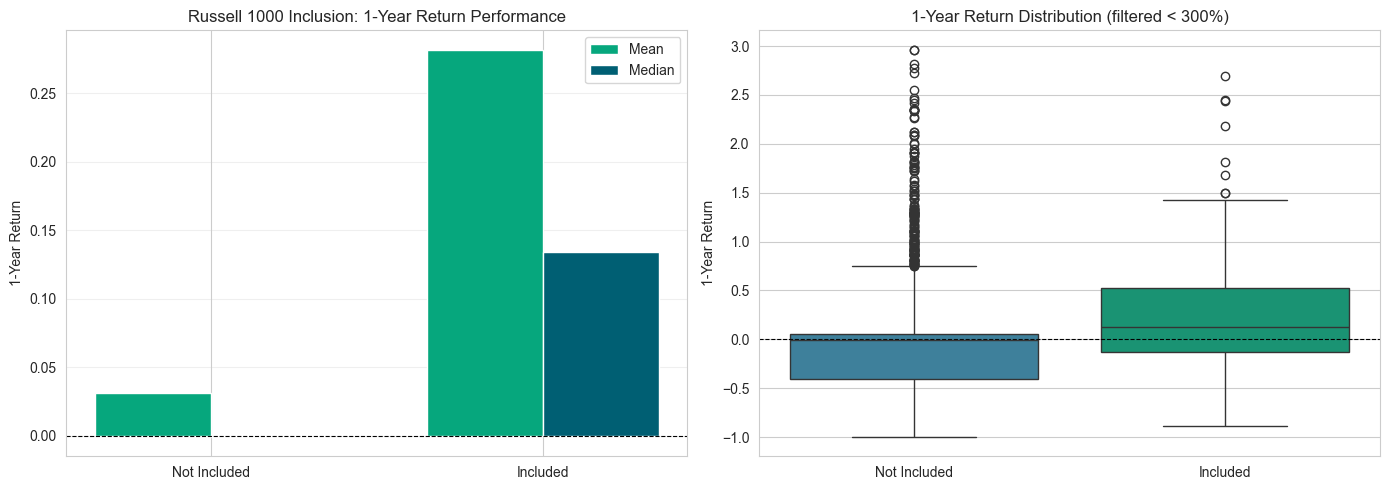

In [14]:
# Visualization: Russell 1000 Performance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mean and Median comparison
russell_stats = stock_ipos.groupby('russell')['sym_252day_ret'].agg(['mean', 'median'])

axes[0].bar(x_pos - width/2, russell_stats['mean'].values, width, label='Mean', color='#06A77D')
axes[0].bar(x_pos + width/2, russell_stats['median'].values, width, label='Median', color='#005F73')
axes[0].set_ylabel('1-Year Return')
axes[0].set_title('Russell 1000 Inclusion: 1-Year Return Performance')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(['Not Included', 'Included'])
axes[0].legend()
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].grid(axis='y', alpha=0.3)

# Box plot
filtered_russell = stock_ipos[stock_ipos['sym_252day_ret'] < 3]
sns.boxplot(x='russell', y='sym_252day_ret', data=filtered_russell, ax=axes[1],
            palette=['#2E86AB', '#06A77D'])
axes[1].set_xticklabels(['Not Included', 'Included'])
axes[1].set_ylabel('1-Year Return')
axes[1].set_xlabel('')
axes[1].set_title('1-Year Return Distribution (filtered < 300%)')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.savefig('russell1000_performance.png', dpi=300, bbox_inches='tight')
plt.show()

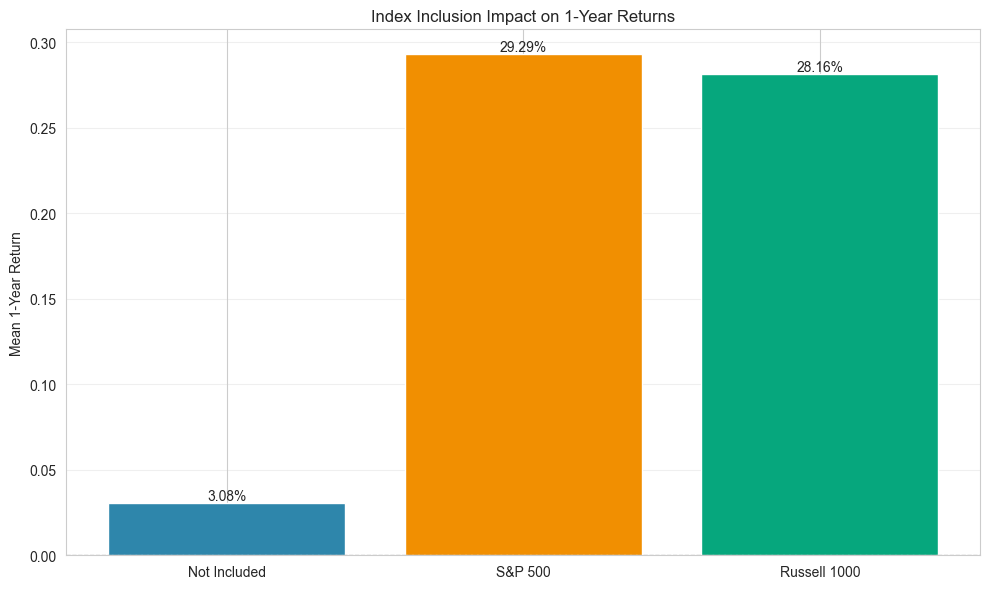

In [15]:
# Comparison: S&P 500 vs Russell 1000
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Not Included', 'S&P 500', 'Russell 1000']
means = [
    stock_ipos[(stock_ipos['sp'] == 'no') & (stock_ipos['russell'] == 'no')]['sym_252day_ret'].mean(),
    stock_ipos[stock_ipos['sp'] == 'yes']['sym_252day_ret'].mean(),
    stock_ipos[stock_ipos['russell'] == 'yes']['sym_252day_ret'].mean()
]

bars = ax.bar(categories, means, color=['#2E86AB', '#F18F01', '#06A77D'])
ax.set_ylabel('Mean 1-Year Return')
ax.set_title('Index Inclusion Impact on 1-Year Returns')
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('index_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Summary Statistics Table

In [16]:
# Create comprehensive summary table
summary_data = {
    'Category': ['Non-SPAC', 'SPAC', 'Not in S&P 500', 'In S&P 500', 'Not in Russell 1000', 'In Russell 1000'],
    'Count': [
        (stock_ipos['spac'] == 'no').sum(),
        (stock_ipos['spac'] == 'yes').sum(),
        (stock_ipos['sp'] == 'no').sum(),
        (stock_ipos['sp'] == 'yes').sum(),
        (stock_ipos['russell'] == 'no').sum(),
        (stock_ipos['russell'] == 'yes').sum()
    ],
    'Mean 1Y Return': [
        stock_ipos[stock_ipos['spac'] == 'no']['sym_252day_ret'].mean(),
        stock_ipos[stock_ipos['spac'] == 'yes']['sym_252day_ret'].mean(),
        stock_ipos[stock_ipos['sp'] == 'no']['sym_252day_ret'].mean(),
        stock_ipos[stock_ipos['sp'] == 'yes']['sym_252day_ret'].mean(),
        stock_ipos[stock_ipos['russell'] == 'no']['sym_252day_ret'].mean(),
        stock_ipos[stock_ipos['russell'] == 'yes']['sym_252day_ret'].mean()
    ],
    'Median 1Y Return': [
        stock_ipos[stock_ipos['spac'] == 'no']['sym_252day_ret'].median(),
        stock_ipos[stock_ipos['spac'] == 'yes']['sym_252day_ret'].median(),
        stock_ipos[stock_ipos['sp'] == 'no']['sym_252day_ret'].median(),
        stock_ipos[stock_ipos['sp'] == 'yes']['sym_252day_ret'].median(),
        stock_ipos[stock_ipos['russell'] == 'no']['sym_252day_ret'].median(),
        stock_ipos[stock_ipos['russell'] == 'yes']['sym_252day_ret'].median()
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\nComprehensive Summary:")
print(summary_df.to_string(index=False))


Comprehensive Summary:
           Category  Count  Mean 1Y Return  Median 1Y Return
           Non-SPAC   3430        0.042634         -0.006979
               SPAC    251        0.013135          0.037302
     Not in S&P 500   3630        0.037079          0.000000
         In S&P 500     51        0.292900          0.171014
Not in Russell 1000   3538        0.030883         -0.001020
    In Russell 1000    143        0.281593          0.133805
